## Use Case Preprocessing - Fehlwerte erkennen
Im Machine Learning Umfeld kann Datenqualität einen entscheidenden Faktor darstellen. Fehlwerte und besonders pseudo-Fehlwerte können die Datenqualität Ihres Datasets deutlich verschlechtern.

Im folgenden Use Case werden Sie sich selbst mit Fehlwerten beschäftigen und diese identifizieren.

In [1]:
## imports
import pandas as pd
import numpy as np
import missingno as msno

In [2]:
## Laden des Datasets
df = pd.read_csv("../Datasets/airbnb.csv")

In [3]:
# Datumsumformungen
df['date_account_created'] = pd.to_datetime(df.date_account_created)
df['date_first_booking'] = pd.to_datetime(df.date_first_booking)
df['timestamp_first_active'] = pd.to_datetime(df.timestamp_first_active, format = "%Y%m%d%H%M%S")

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213451 entries, 0 to 213450
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   id                       213451 non-null  object        
 1   date_account_created     213451 non-null  datetime64[ns]
 2   timestamp_first_active   213451 non-null  datetime64[ns]
 3   date_first_booking       88908 non-null   datetime64[ns]
 4   gender                   213451 non-null  object        
 5   age                      125461 non-null  float64       
 6   signup_method            213451 non-null  object        
 7   signup_flow              213451 non-null  int64         
 8   language                 213451 non-null  object        
 9   affiliate_channel        213451 non-null  object        
 10  affiliate_provider       213451 non-null  object        
 11  first_affiliate_tracked  207386 non-null  object        
 12  signup_app      

In [5]:
df.loc[df.gender=='-unknown-', 'gender'] = np.NaN # replacement

Wie Sie bereits in der Vorschau gesehen haben, sind im Feature 'gender' versteckte Fehlwerte hinterlegt. Es gibt ein weiteres Feature, welches pseudo-Fehlwerte enthält. Finden Sie es? Ersetzen Sie daraufhin alle Fehlwerte mit nan's wie zuvor dargestellt.

In [6]:
df.head()

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
0,gxn3p5htnn,2010-06-28,2009-03-19 04:32:55,NaT,NaN,NaN,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF
1,820tgsjxq7,2011-05-25,2009-05-23 17:48:09,NaT,MALE,38.0,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,NDF
2,4ft3gnwmtx,2010-09-28,2009-06-09 23:12:47,2010-08-02,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,US
3,bjjt8pjhuk,2011-12-05,2009-10-31 06:01:29,2012-09-08,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other
4,87mebub9p4,2010-09-14,2009-12-08 06:11:05,2010-02-18,NaN,41.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US


In [20]:
df['first_affiliate_tracked'].unique()

array(['untracked', 'omg', nan, 'linked', 'tracked-other', 'product',
       'marketing', 'local ops'], dtype=object)

In [18]:
df.loc[df.first_browser=='-unknown-', 'first_browser'] = np.NaN

In [21]:
df.loc[df.first_affiliate_tracked=='untracked', 'first_affiliate_tracked'] = np.NaN

<AxesSubplot:>

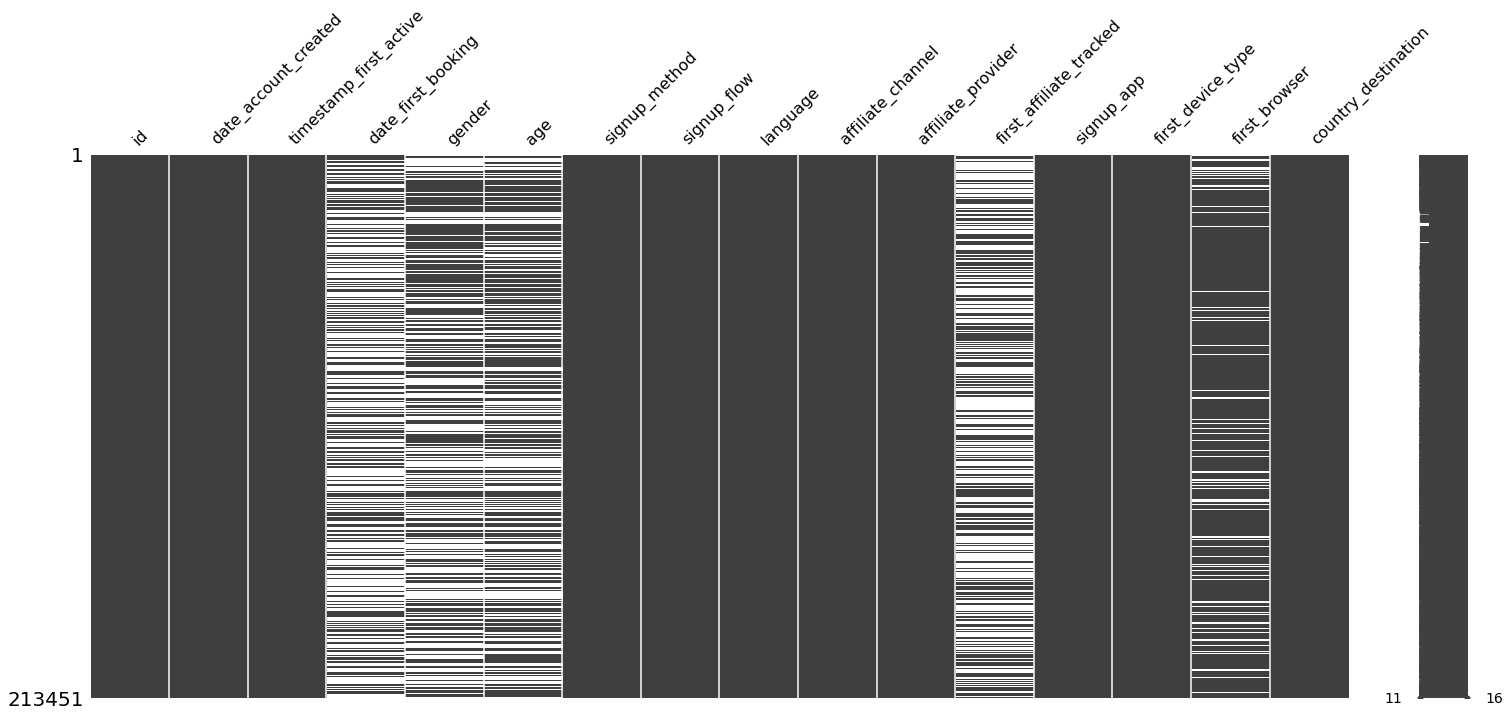

In [22]:
msno.matrix(df)

Sie können natürlich auch ihr Dataset oder bestimmte Variablen nach Fehlwerten filtern. Dies geht mit der df.isna()-Methode. Diese gibt Ihnen eine Maske zurück.

In [ ]:
df.gender.isna()

In [ ]:
df.loc[df.gender.isna(),:] # Alle Zeilen mit allen Spalten bei denen gender fehlt.

Probieren Sie es ebenfalls mit der eben gerade von Ihnen bereinigten Variable.

In [ ]:
## Ihr Code

Eine weiteres Datenqualitätsproblem sind falsche Angaben. Diese Müssen herausgefiltert werden und je nach Anwendungsfall neu zugeordnet, oder gelöscht werden. Finden Sie das Feature indem möglicherweise falsche Angaben gemacht wurden?
Tipp: verwenden Sie die describe()-Methode

In [ ]:
## Ihr Code

Ersetzen Sie alle potenziellen Falschangaben durch nan's

In [ ]:
## Ihr Code